# Newton v/s gradient descent #



In [1]:
import matplotlib
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm, lines, collections, colors
import matplotlib.patches as patches

Consider $f(x, y) = -\log(1-x-y) - \log(x) - \log(y)$ over $\left(0,\frac{1}{2}\right)^2$.

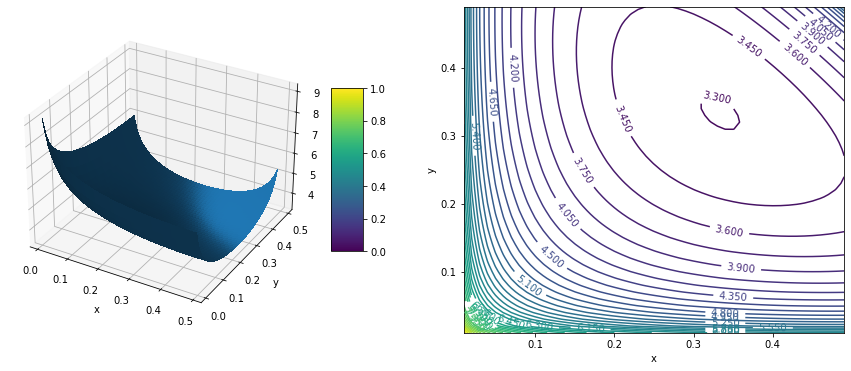

In [2]:
# Define the function

delta = 0.01 # spacing between samples in each dimension
xx = np.arange(0.01, 0.5, delta)
yy = np.arange(0.01, 0.5, delta)
X, Y = np.meshgrid(xx, yy)

Z = -np.log(1-X-Y) - np.log(X) - np.log(Y)

# Plot the functions
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)


# Surface plot
surf = ax1.plot_surface(X, Y, Z, linewidth=0, antialiased=False)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# Contour plot
contours = ax2.contour(X, Y, Z, 50)
ax2.clabel(contours, inline=True, fontsize=10)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

The gradient is given by 
$$\nabla f(x,y) = \begin{pmatrix} \frac{1}{1-x-y} - \frac{1}{x} \\ \frac{1}{1-x-y} - \frac{1}{y} \end{pmatrix}.$$

Unique optimizer is at $(x_\star, y_\star) = \left(\frac{1}{3}, \frac{1}{3} \right)$.

The Hessian is then
$$\nabla^2 f(x,y) = \begin{pmatrix} \frac{1}{(1-x-y)^2} + \frac{1}{x^2} &  \frac{1}{(1-x-y)^2} \\  \frac{1}{(1-x-y)^2} & \frac{1}{(1-x-y)^2} + \frac{1}{y^2} \end{pmatrix}.$$

Ex. Show that the Hessian is indeed positive definite over this domain.

In [3]:
# Define the gradient descent algorithm

# Starting point
x_0 = np.array([0.20, 0.45])

# Gradient
def gradient(v):
    # the 1st dimension is x, the 2nd dimension is y
    return np.array([1/(1-v[0]-v[1]) - 1/v[0], 1/(1-v[0]-v[1]) - 1/v[1]])


def hessian(v):
    return np.array([ [1/((1-v[0]-v[1])**2) + 1/(v[0]**2), 1/((1-v[0]-v[1])**2)], 
                     [1/((1-v[0]-v[1])**2), 1/((1-v[0]-v[1])**2) + 1/(v[1]**2)]])


# Tolerance
tolerance = 1e-15

In [4]:
# Newton iteration
x = x_0
lines_Newton = []

# The optimum
x_star = [1/3, 1/3]
distances_Newton = [np.linalg.norm(x-x_star)]

# Run Newton method
for ii in range(10000):   
    step = - np.matmul(np.linalg.inv(hessian(x)),  gradient(x))
    x_prime = x + step

    lines_Newton.append([x.tolist(), x_prime.tolist()])
    
    # Termination criterion 2    
    if np.all(np.abs(step) <= tolerance):
        break
        
    x = x_prime
    
    distances_Newton.append(np.linalg.norm(x-x_star))
    
print(f'Newton method: Final iterate = {x}.')
print(f'Newton method: Number of iterations = {ii}.')

Newton method: Final iterate = [0.33333333 0.33333333].
Newton method: Number of iterations = 5.


In [5]:
# Gradient descent iteration
x = x_0
lines_gradient = []

# Step size
alpha = 0.05

# The optimum
x_star = [1/3, 1/3]
distances_gradient = [np.linalg.norm(x-x_star)]

# Run gradient descent
for ii in range(10000):   
    step = - alpha * gradient(x)
    x_prime = x + step

    lines_gradient.append([x.tolist(), x_prime.tolist()])
    
    # Termination criterion 2    
    if np.all(np.abs(step) <= tolerance):
        break
        
    x = x_prime
    
    distances_gradient.append(np.linalg.norm(x-x_star))
    
print(f'Gradient method: Final iterate = {x}.')
print(f'Gradient method: Number of iterations = {ii}.')

Gradient method: Final iterate = [0.33333333 0.33333333].
Gradient method: Number of iterations = 53.


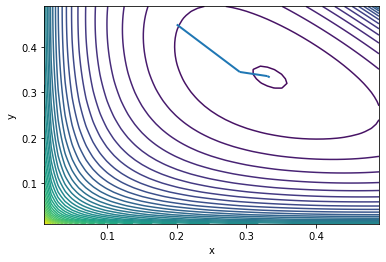

In [6]:
# Contour plot again with descent dynamics
fig = plt.figure()
ax = fig.add_subplot()

contours = ax.contour(X, Y, Z, 50)

lc_Newton = collections.LineCollection(lines_Newton,linewidths=2)
ax.add_collection(lc_Newton)
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

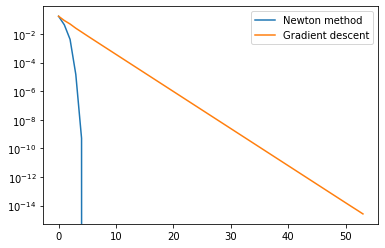

In [7]:
# Contour plot again with descent dynamics
fig = plt.figure()

plt.plot(distances_Newton, label='Newton method')
plt.plot(distances_gradient, label='Gradient descent')
plt.legend()

plt.yscale("log")

plt.show()